## Read Data

In [45]:
import json

# Load JSON data from a file
with open('new_measurements.json', 'r') as file:
    json_data = json.load(file)
    sensor_data = json_data['data']

In [46]:
sensor_data[0] 

{'tid': 'voltage_sensor_0',
 'timestamps': ['2022-05-06 11:19:22.749560',
  '2022-05-06 11:19:25.749560',
  '2022-05-06 11:19:29.749560',
  '2022-05-06 11:19:30.749560',
  '2022-05-06 11:19:32.749560',
  '2022-05-06 11:19:36.749560',
  '2022-05-06 11:19:37.749560',
  '2022-05-06 11:19:40.749560',
  '2022-05-06 11:19:42.749560',
  '2022-05-06 11:19:43.749560',
  '2022-05-06 11:19:47.749560',
  '2022-05-06 11:19:50.749560',
  '2022-05-06 11:19:52.749560',
  '2022-05-06 11:19:54.749560',
  '2022-05-06 11:19:57.749560',
  '2022-05-06 11:20:00.749560',
  '2022-05-06 11:20:04.749560',
  '2022-05-06 11:20:05.749560',
  '2022-05-06 11:20:08.749560',
  '2022-05-06 11:20:12.749560',
  '2022-05-06 11:20:14.749560',
  '2022-05-06 11:20:17.749560',
  '2022-05-06 11:20:18.749560',
  '2022-05-06 11:20:22.749560',
  '2022-05-06 11:20:23.749560',
  '2022-05-06 11:20:26.749560',
  '2022-05-06 11:20:27.749560',
  '2022-05-06 11:20:29.749560',
  '2022-05-06 11:20:33.749560',
  '2022-05-06 11:20:37.749560'

In [47]:
import pandas as pd

# Prepare lists to hold the DataFrame data
timestamps = []
values = []
tids = []

# Extract data from each sensor entry
for entry in sensor_data:
    tid = entry['tid']
    for idx, timestamp in enumerate(entry['timestamps']):
        timestamps.append(timestamp)
        values.append(entry['values'][idx])
        tids.append(tid)

# Create a DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'value': values,
    'tid': tids
})

# Convert 'timestamp' to datetime type if necessary
df['timestamp'] = pd.to_datetime(df['timestamp'])

## 1. How many Empty values were removed?


In [48]:
import numpy as np

# Convert 'N/A' strings to actual N/A values
df.replace('N/A', np.nan, inplace=True)

# Now you can check how many actual N/As there are
print(df.isnull().sum())

timestamp        0
value        39641
tid              0
dtype: int64


In [49]:
# Drop missing values
df_clean = df.dropna()

In [50]:
print(df_clean.isnull().sum())

timestamp    0
value        0
tid          0
dtype: int64


In [51]:
num_nan = len(df['value']) - len(df_clean['value'])
print("number of empty values removed:", num_nan)

number of empty values removed: 39641


## 39641 empty values were removed.

## 2. How many Outliers were removed?

In [52]:
from scipy import stats
import numpy as np

# Calculate Z-scores of the data
z_scores = np.abs(stats.zscore(df_clean['value']))
df_no_outliers = df_clean[z_scores < 3]

In [53]:
len(df_no_outliers['value'])

520359

In [54]:
num_outlier = len(df_clean['value']) - len(df_no_outliers['value'])
print("number of outlier removed:", num_outlier)

number of outlier removed: 40000


In [55]:
df_final = df_no_outliers

In [56]:
df_final.to_csv('cleaned_data.csv', index=False)

## 40000 outliers were removed.


## 3. What trends did you observe (e.g. minutely/hourly/daily) in each?


In [57]:
df_final['timestamp'] = pd.to_datetime(df['timestamp'])

/var/folders/b_/_n3cd1cs2p75wp8rqw_vny2m0000gn/T/ipykernel_91661/1683935113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['timestamp'] = pd.to_datetime(df['timestamp'])


In [58]:
df_final.dtypes

timestamp    datetime64[ns]
value               float64
tid                  object
dtype: object

In [59]:
# Set the timestamp column as the DataFrame index
df_final.set_index('timestamp', inplace=True)

Sensor ID: voltage_sensor_0


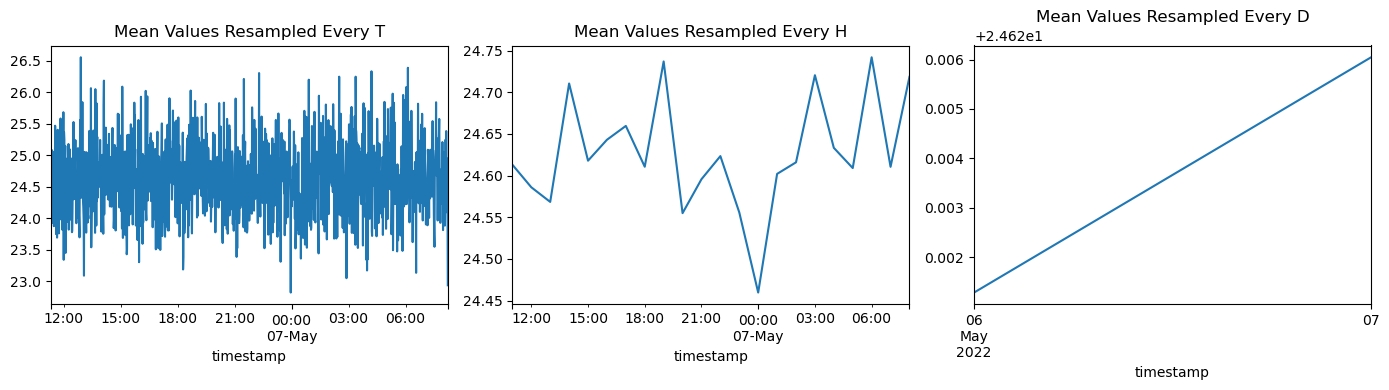

Sensor ID: voltage_sensor_1


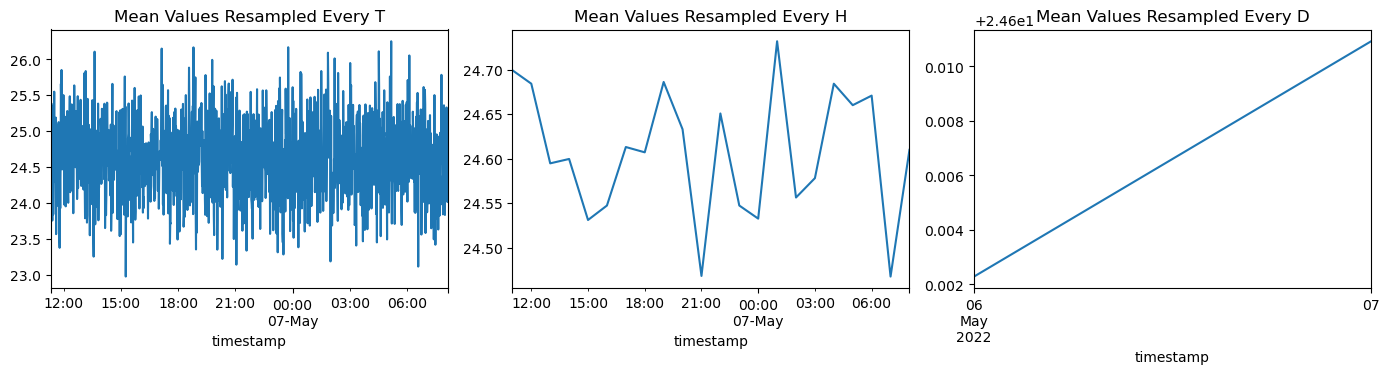

Sensor ID: voltage_sensor_10


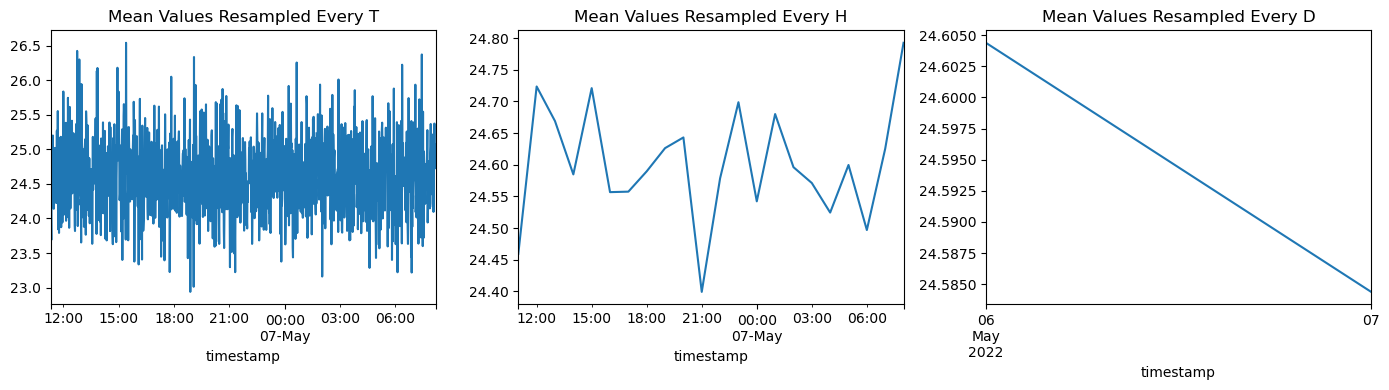

Sensor ID: voltage_sensor_11


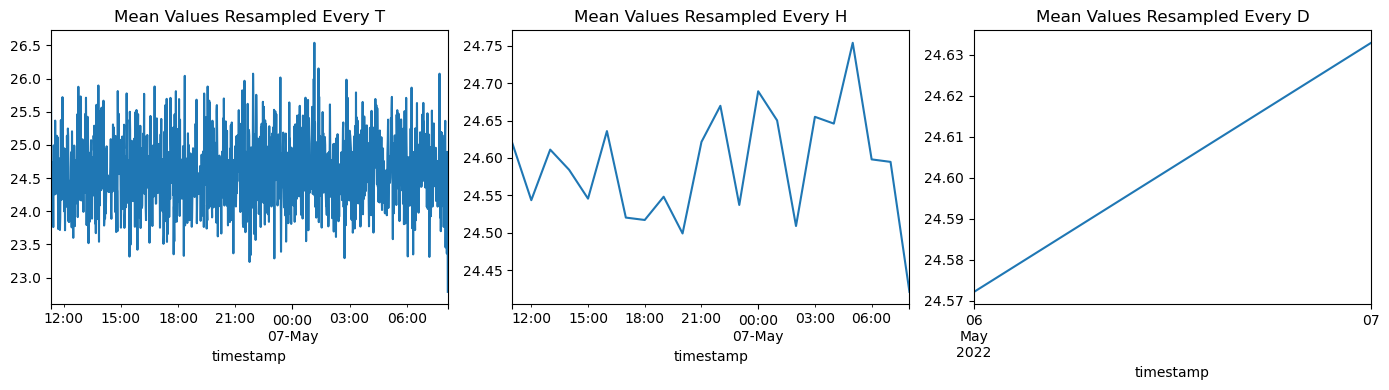

Sensor ID: voltage_sensor_12


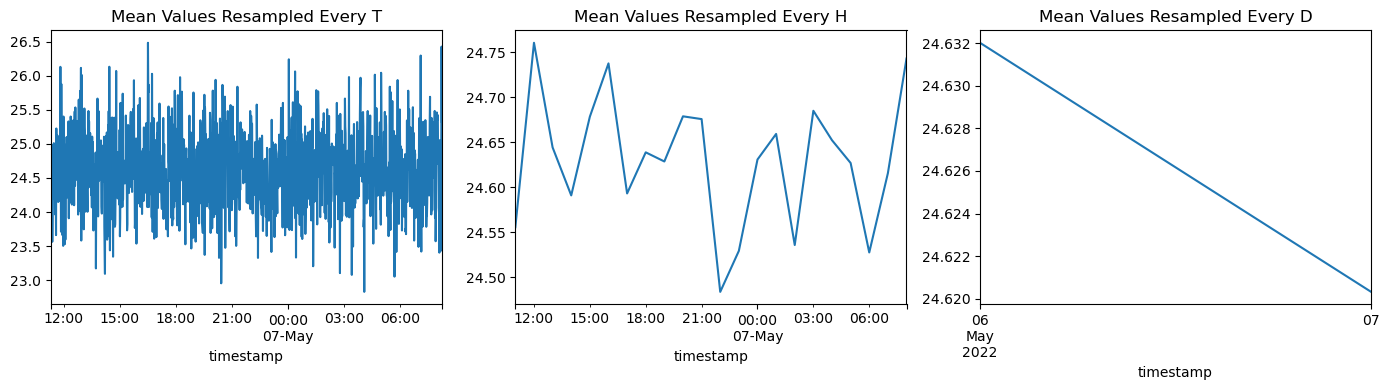

Sensor ID: voltage_sensor_13


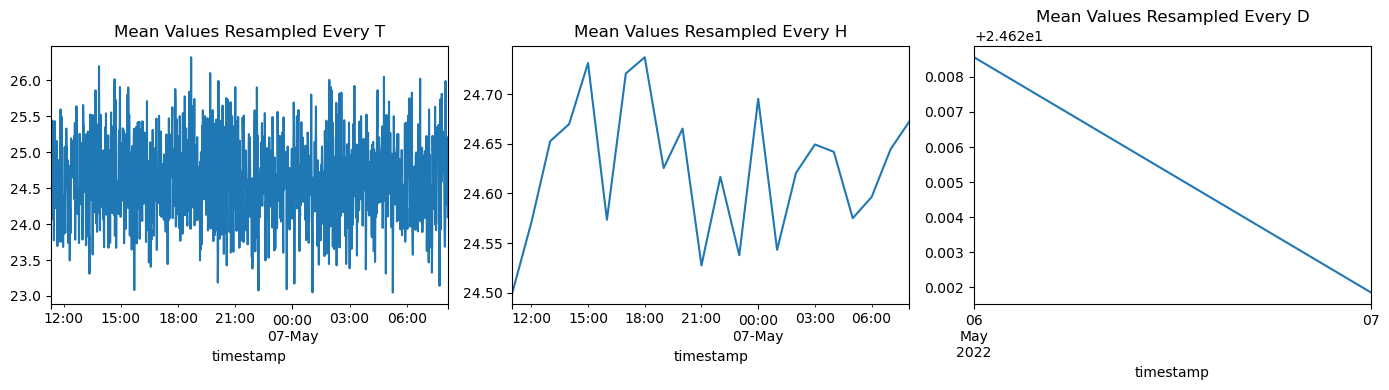

Sensor ID: voltage_sensor_14


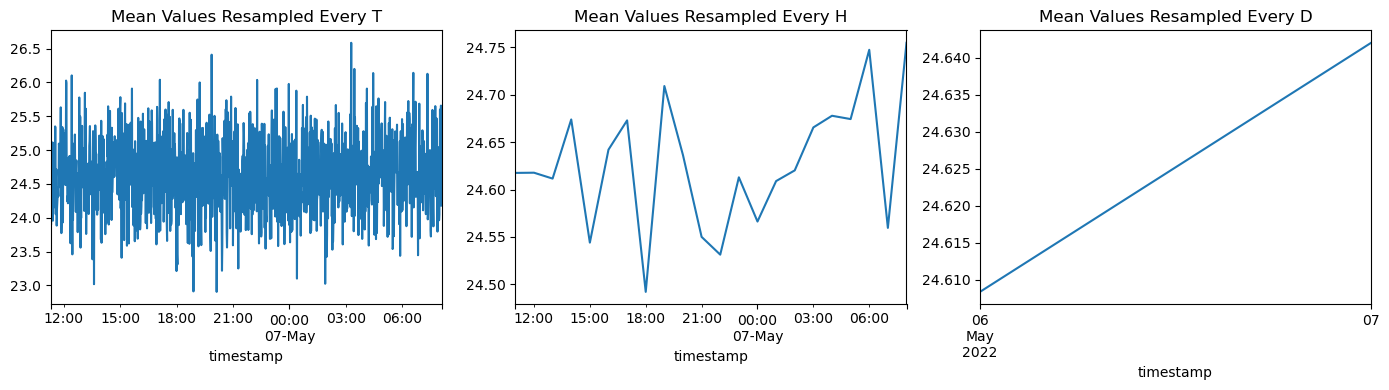

Sensor ID: voltage_sensor_15


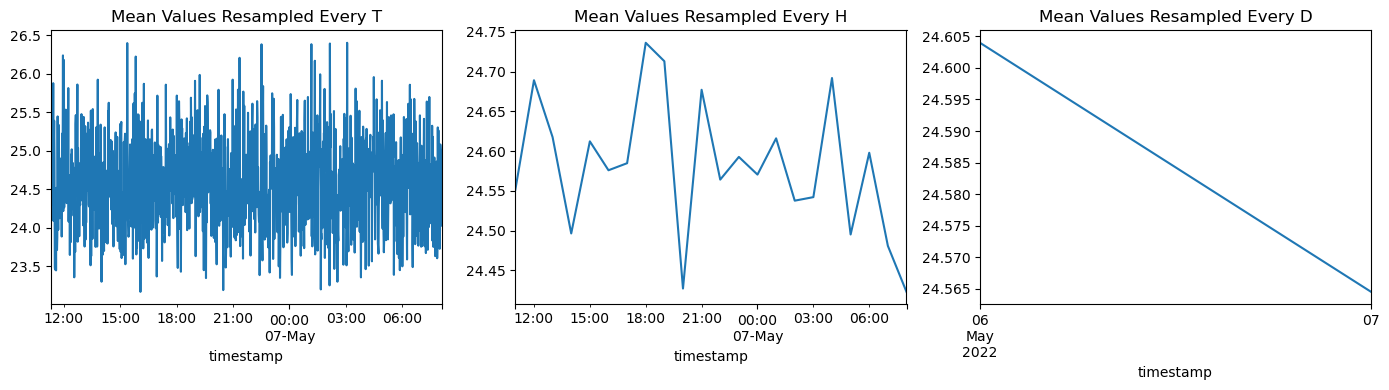

Sensor ID: voltage_sensor_16


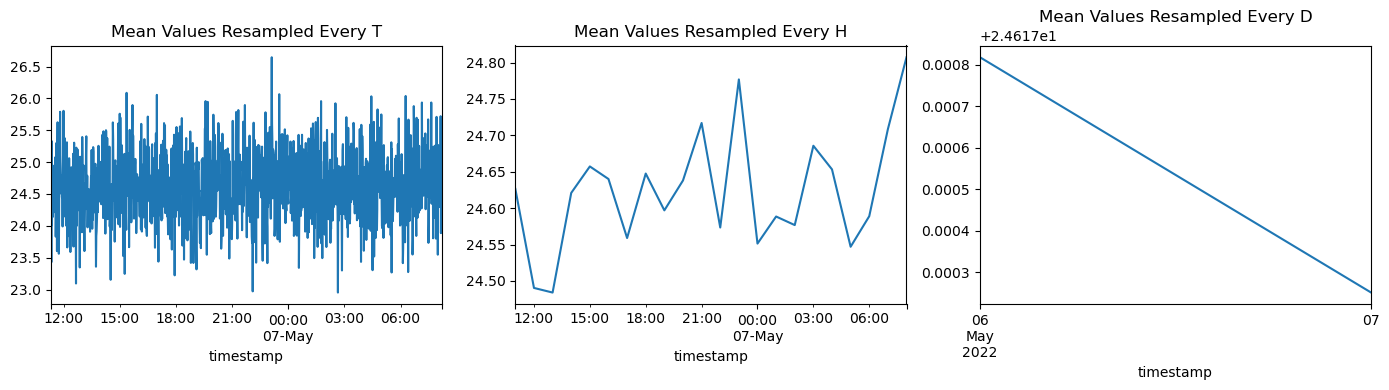

Sensor ID: voltage_sensor_17


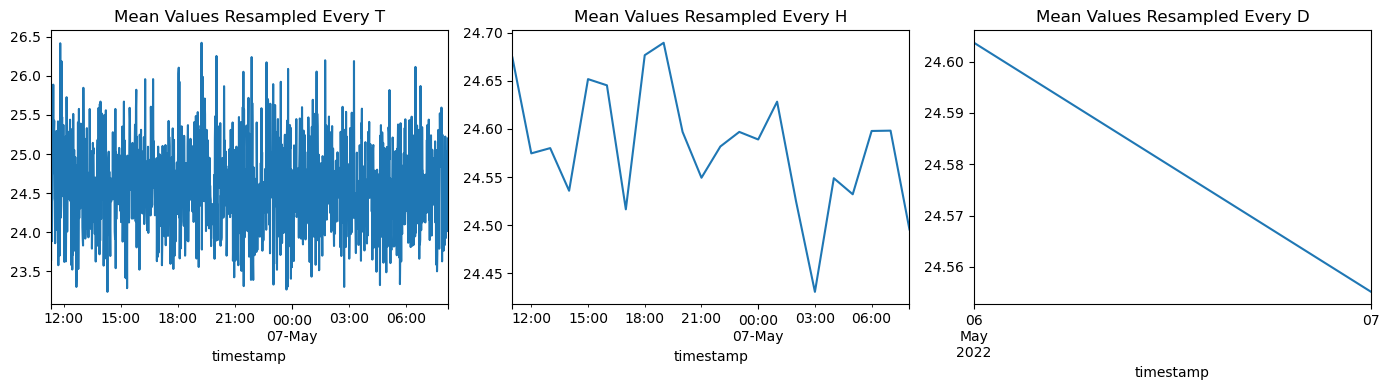

Sensor ID: voltage_sensor_18


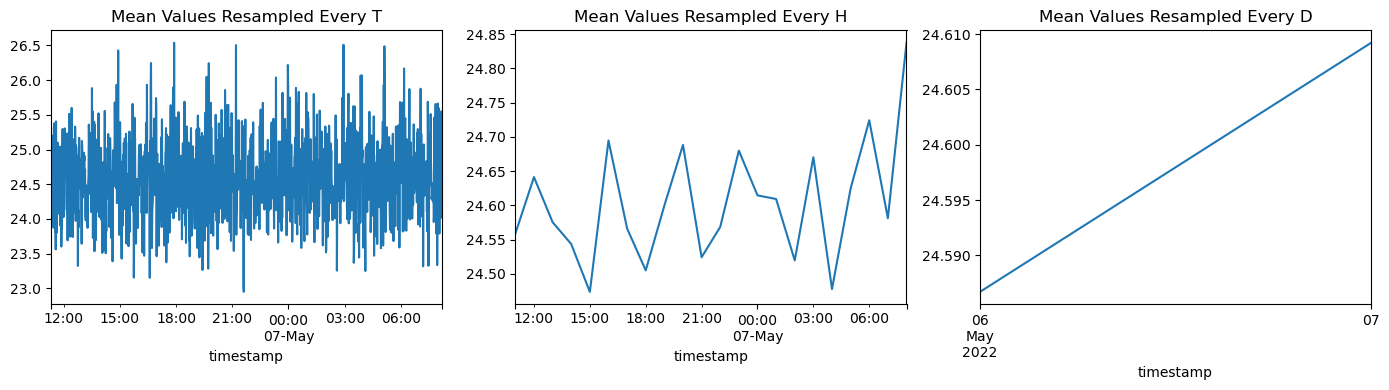

Sensor ID: voltage_sensor_19


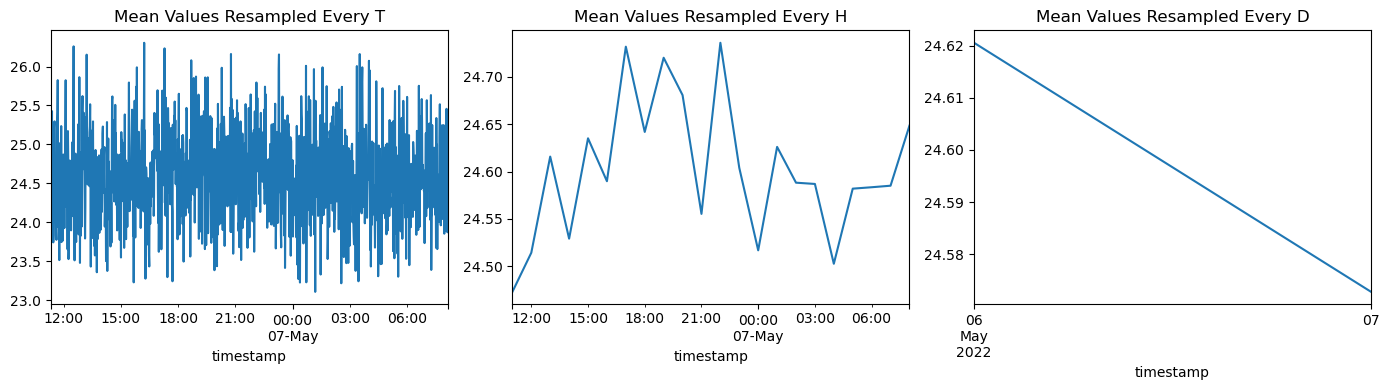

Sensor ID: voltage_sensor_2


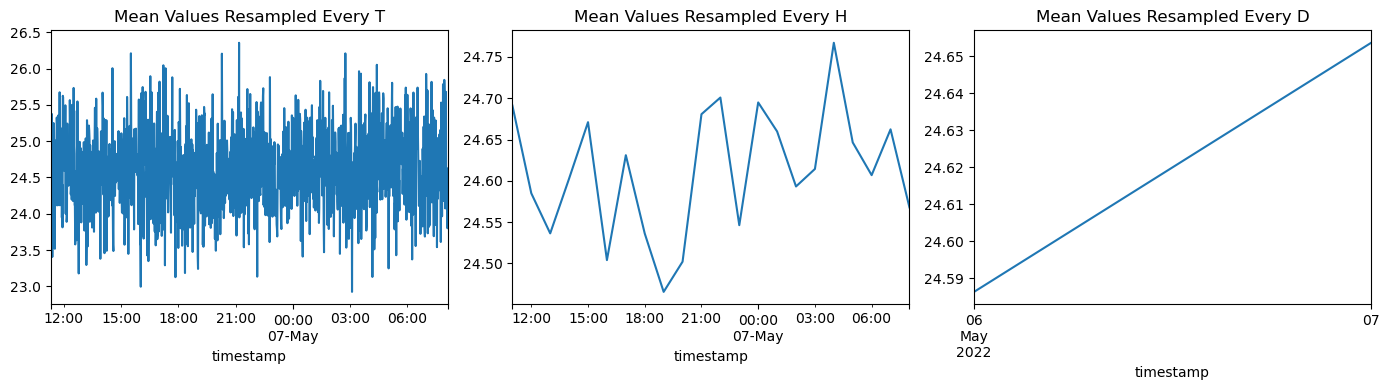

Sensor ID: voltage_sensor_3


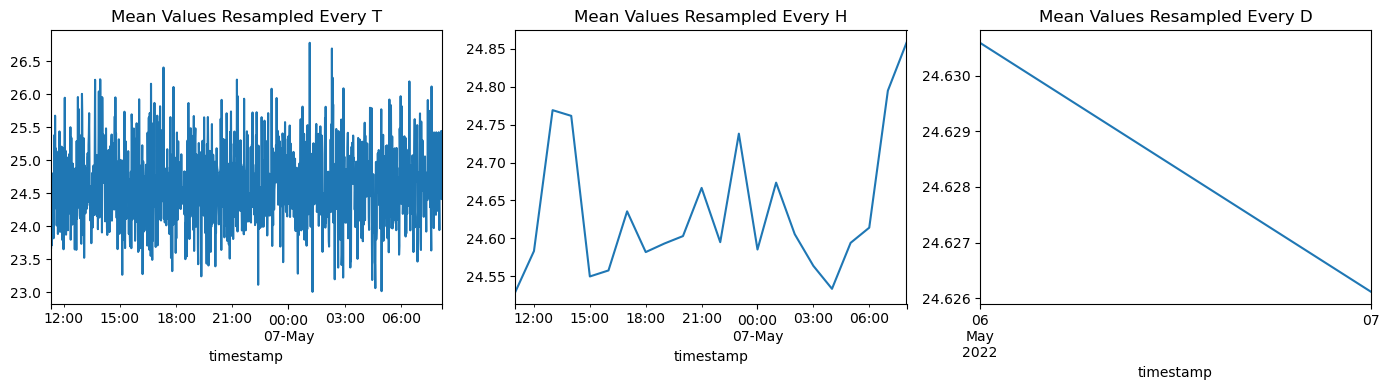

Sensor ID: voltage_sensor_4


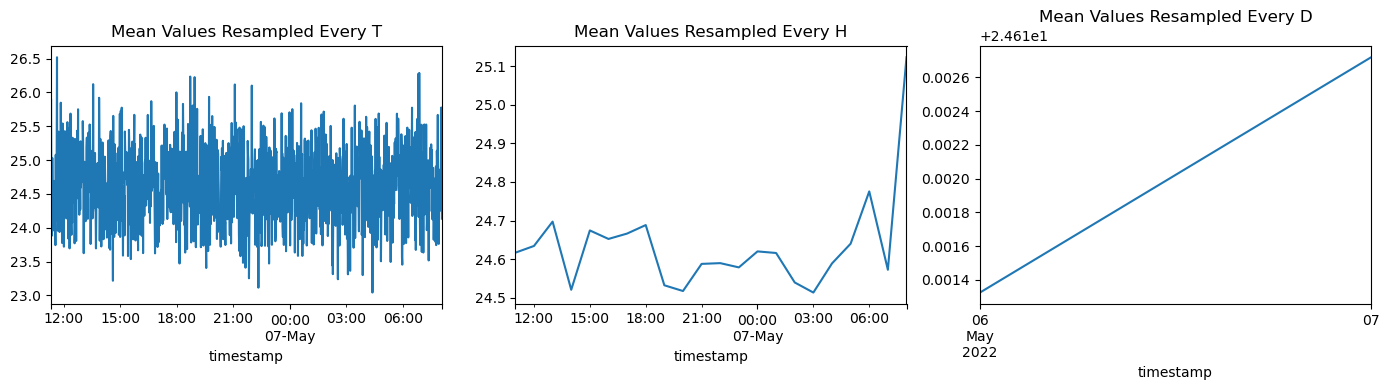

Sensor ID: voltage_sensor_5


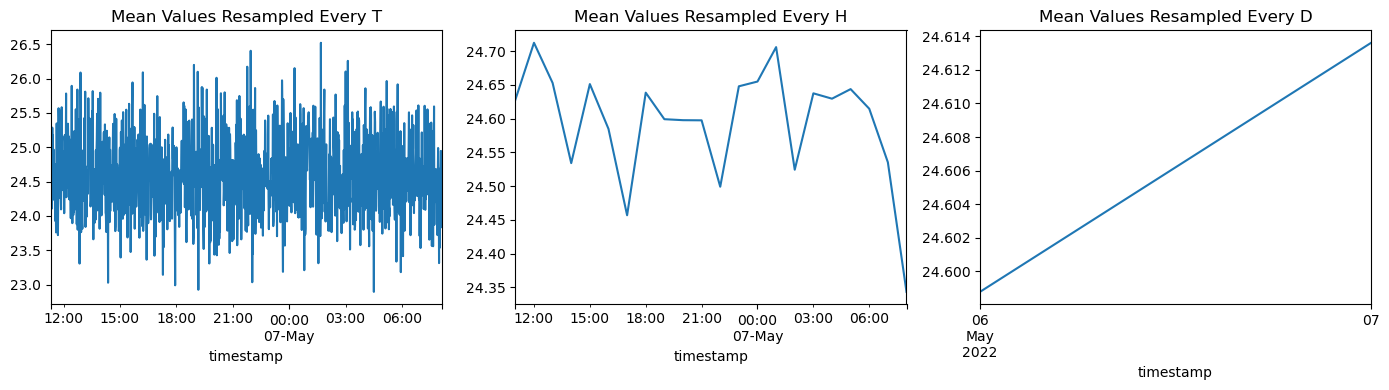

Sensor ID: voltage_sensor_6


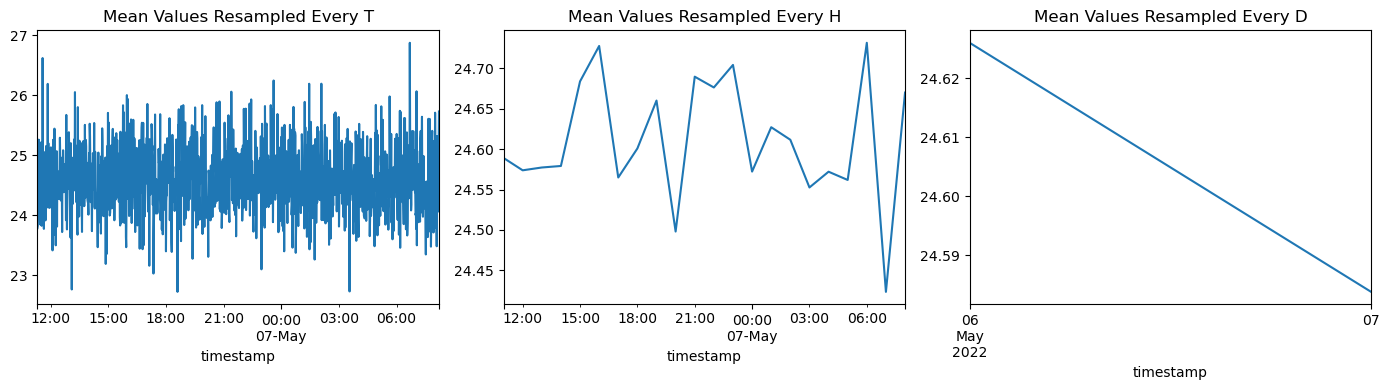

Sensor ID: voltage_sensor_7


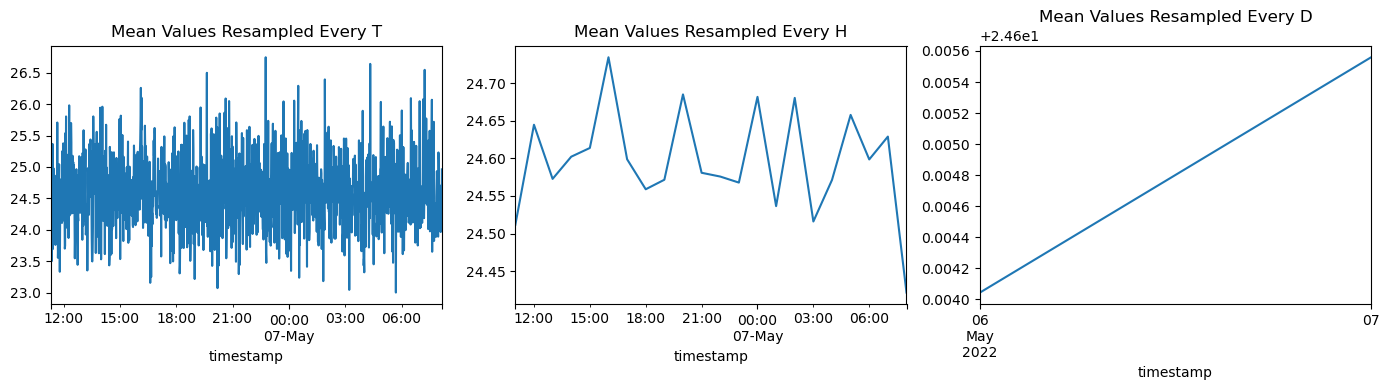

Sensor ID: voltage_sensor_8


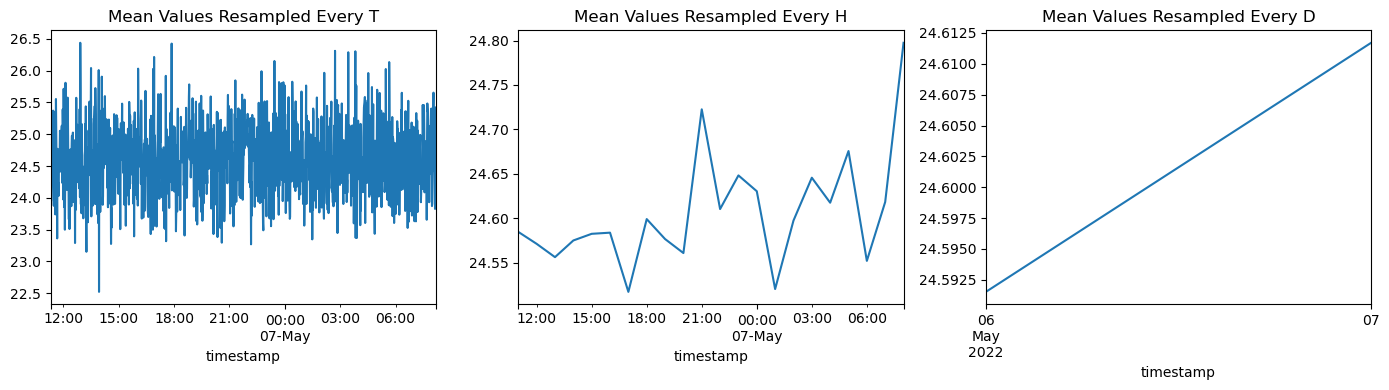

Sensor ID: voltage_sensor_9


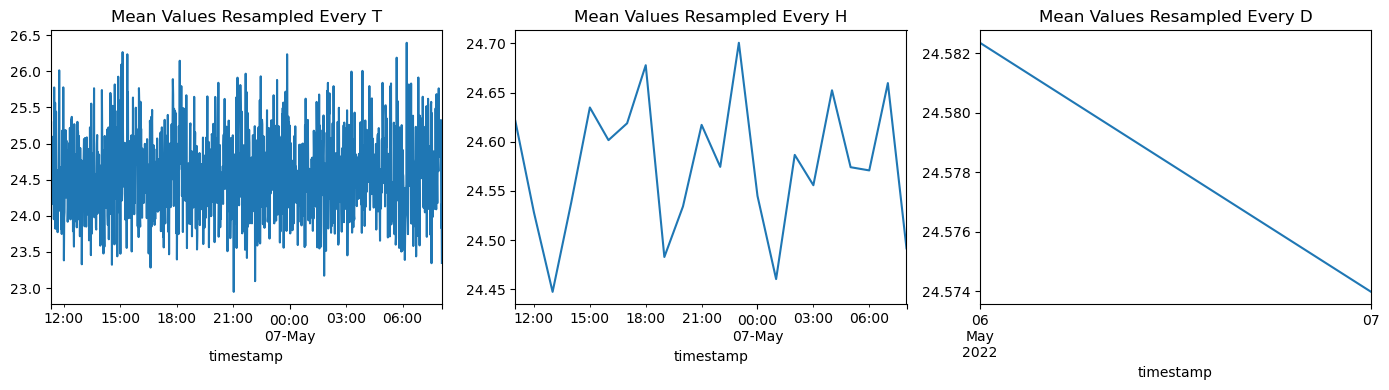

In [60]:
# Group by 'tid' and resample
grouped = df_final.groupby('tid')

# Define a function to resample and plot data
def resample_and_plot(data, frequency):
    resampled_data = data.resample(frequency).mean()
    resampled_data.plot(title=f'Mean Values Resampled Every {frequency}')

import matplotlib.pyplot as plt

# Loop through each group and resample
for name, group in grouped:
    print(f"Sensor ID: {name}")
    plt.figure(figsize=(14, 4))
    plt.subplot(131)
    resample_and_plot(group['value'], 'T')  # Minutely trends
    plt.subplot(132)
    resample_and_plot(group['value'], 'H')  # Hourly trends
    plt.subplot(133)
    resample_and_plot(group['value'], 'D')  # Daily trends
    plt.tight_layout()
    plt.show()

## Sensor 0: The minutely trend frequently fluctuates within a range between 22.5 and 26.5; the hourly trend shows at midnight the value is lowest and there are five peaks in the voltages throughout the data; the daily trend shows an increment in voltage value.

## Sensor 1: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows at night and morning the value is lowest and there are five peaks in the voltages throughout the data; the daily trend shows an increment in voltage value.

## Sensor 2: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows at night the value is lowest and there are seven peaks in the voltages throughout the data; the daily trend shows an increment in voltage value.

## Sensor 3: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows value is mostly low and there are six peaks in the voltages throughout the data; the daily trend shows a decrease in voltage value.


## Sensor 4: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows value is mostly low and there is a huge peak in the morning throughout the data; the daily trend shows an increase in voltage value.

## Sensor 5: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows value is lowest in the morning and there are five peaks in the voltages throughout the data; the daily trend shows a increase in voltage value.

## Sensor 6: The minutely trend frequently fluctuates within a range between 22.5 and 27; the hourly trend shows value is lowest in the morning and there are six peaks in the voltages throughout the data; the daily trend shows a decrease in voltage value.

## Sensor 7: The minutely trend frequently fluctuates within a range between 23 and 27; the hourly trend shows value is mostly low and there are six peaks in the voltages throughout the data; the daily trend shows an increase in voltage value.

## Sensor 8: The minutely trend frequently fluctuates within a range between 22.5 and 26.5; the hourly trend shows the value is lowest at midnight and there are three peaks in the voltages throughout the data; the daily trend shows a increase in voltage value.

## Sensor 9: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows value also fluctuates and there are five peaks in the voltages throughout the data; the daily trend shows a decrease in voltage value.

## Sensor 10: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows value is lowest at 9 pm and there are six peaks in the voltages throughout the data; the daily trend shows a decrease in voltage value.

## Sensor 11: The minutely trend frequently fluctuates within a range between 23.5 and 26.5; the hourly trend fluctuates a lot and there are a lot of peaks in the voltages throughout the data; the daily trend shows a increase in voltage value.

## Sensor 12: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows value is the lowest at 9 pm and there are six peaks in the voltages throughout the data; the daily trend shows a decrease in voltage value.

## Sensor 13: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend fluctuates a lot and there are five peaks in the voltages throughout the data; the daily trend shows a decrease in voltage value.

## Sensor 14: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows value is lowest at 6 pm and there are five peaks in the voltages throughout the data; the daily trend shows a increase in voltage value.

## Sensor 15: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows its lowest around 10 pm and there are five peaks in the voltages throughout the data; the daily trend shows a decrease in voltage value.

## Sensor 16: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows lowest value at 1 pm and there are five peaks in the voltages throughout the data; the daily trend shows a decrease in voltage value.

## Sensor 17: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows lowest value at 3 am and there are four peaks in the voltages throughout the data; the daily trend shows a decrease in voltage value.

## Sensor 18: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend fluctuates a lot and there are seven peaks in the voltages throughout the data; the daily trend shows an increase in voltage value.

## Sensor 19: The minutely trend frequently fluctuates within a range between 23 and 26.5; the hourly trend shows value is lowest at 11 am and there are five peaks in the voltages throughout the data; the daily trend shows a decrease in voltage value.

## 4. What is the mean value for each sensor tid alongwith the spread (standard deviation)?

In [61]:
df_final.reset_index(inplace=True)

In [63]:
# Calculate mean and standard deviation for each sensor
stats = df_final.groupby('tid')['value'].agg(['mean', 'std'])

# Print the results
print(stats)

                        mean       std
tid                                   
voltage_sensor_0   24.623157  2.529138
voltage_sensor_1   24.605665  2.521813
voltage_sensor_10  24.596521  2.522036
voltage_sensor_11  24.595757  2.524925
voltage_sensor_12  24.627425  2.528135
voltage_sensor_13  24.625929  2.516782
voltage_sensor_14  24.621470  2.519234
voltage_sensor_15  24.588586  2.518973
voltage_sensor_16  24.617596  2.535277
voltage_sensor_17  24.584684  2.528989
voltage_sensor_18  24.595557  2.525329
voltage_sensor_19  24.601852  2.524379
voltage_sensor_2   24.612705  2.527688
voltage_sensor_3   24.628836  2.544890
voltage_sensor_4   24.611867  2.513876
voltage_sensor_5   24.604542  2.522182
voltage_sensor_6   24.609424  2.530097
voltage_sensor_7   24.604636  2.523483
voltage_sensor_8   24.599474  2.522151
voltage_sensor_9   24.579069  2.511516


## 5. Peak voltage times for each sensor tid

In [64]:
# Group by 'tid' and find the index of the maximum 'value'
peak_indices = df_final.groupby('tid')['value'].idxmax()

peak_voltages = df_final.loc[peak_indices]

In [73]:
print(peak_voltages[['tid', 'timestamp']])

                      tid                  timestamp
7        voltage_sensor_0 2022-05-06 11:19:40.749560
25989    voltage_sensor_1 2022-05-06 11:19:23.749560
260136  voltage_sensor_10 2022-05-06 11:19:54.749560
286145  voltage_sensor_11 2022-05-06 11:19:30.749560
312138  voltage_sensor_12 2022-05-06 11:19:29.749560
338082  voltage_sensor_13 2022-05-06 11:20:33.749560
364110  voltage_sensor_14 2022-05-06 11:19:41.749560
390181  voltage_sensor_15 2022-05-06 11:20:25.749560
416280  voltage_sensor_16 2022-05-06 11:19:29.749560
442295  voltage_sensor_17 2022-05-06 11:19:39.749560
468335  voltage_sensor_18 2022-05-06 11:20:20.749560
494336  voltage_sensor_19 2022-05-06 11:19:36.749560
51975    voltage_sensor_2 2022-05-06 11:19:28.749560
77992    voltage_sensor_3 2022-05-06 11:21:32.749560
103904   voltage_sensor_4 2022-05-06 11:19:32.749560
129982   voltage_sensor_5 2022-05-06 11:20:41.749560
155904   voltage_sensor_6 2022-05-06 11:19:50.749560
181958   voltage_sensor_7 2022-05-06 11:21:53.

## 6. Low voltage times for each sensor tid

In [66]:
# Group by 'tid' and find the index of the minimum 'value'
min_indices = df_final.groupby('tid')['value'].idxmin()

min_voltages = df_final.loc[min_indices]

In [72]:
print(min_voltages[['tid', 'timestamp']])

                      tid                  timestamp
9        voltage_sensor_0 2022-05-06 11:19:43.749560
25990    voltage_sensor_1 2022-05-06 11:19:27.749560
260130  voltage_sensor_10 2022-05-06 11:19:27.749560
286142  voltage_sensor_11 2022-05-06 11:19:20.749560
312135  voltage_sensor_12 2022-05-06 11:19:23.749560
338057  voltage_sensor_13 2022-05-06 11:19:23.749560
364109  voltage_sensor_14 2022-05-06 11:19:37.749560
390164  voltage_sensor_15 2022-05-06 11:19:36.749560
416294  voltage_sensor_16 2022-05-06 11:20:06.749560
442292  voltage_sensor_17 2022-05-06 11:19:30.749560
468317  voltage_sensor_18 2022-05-06 11:19:27.749560
494331  voltage_sensor_19 2022-05-06 11:19:24.749560
51983    voltage_sensor_2 2022-05-06 11:19:55.749560
77960    voltage_sensor_3 2022-05-06 11:19:45.749560
103901   voltage_sensor_4 2022-05-06 11:19:23.749560
129956   voltage_sensor_5 2022-05-06 11:19:20.749560
155896   voltage_sensor_6 2022-05-06 11:19:33.749560
181902   voltage_sensor_7 2022-05-06 11:19:24.

## 7. How Many potential anomalies were found? Describe your thought process

In [68]:
Q1 = df_final['value'].quantile(0.25)
Q3 = df_final['value'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
anomalies = df_final[(df_final['value'] < lower_bound) | (df_final['value'] > upper_bound)]
number_of_anomalies = len(anomalies)

In [69]:
number_of_anomalies

0

## 39641 potential anomalies were found. This is calculated by the number of outliers in the dataset. When I use the IQR method for anomaly detection and find 0 datapoint lie significantly outside the middle 50% of the data. Therefore in my opinion the number of potential anomalies should be the number of outliers we eliminate at the first step.